In [3]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [4]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# Importar Arrays de Entrenamiento, Validación y Prueba

In [5]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [6]:
len(array_Xtrain)

646359

In [7]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [8]:
len(array_Ytrain)

646359

In [9]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'rb') as f:
    array_Xval = np.load(f)

In [10]:
len(array_Xval)

23635

In [11]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'rb') as f:
    array_Yval = np.load(f)

In [12]:
len(array_Yval)

23635

In [13]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [14]:
len(array_Xtest)

88632

In [15]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [16]:
len(array_Ytest)

88632

In [17]:
array_Xtrain.shape[1]

30

In [18]:
array_Xtrain.shape[2]

5

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
array_Xtrain

array([[[0.17173913, 0.7826087 , 0.25423729, 0.6       , 0.5       ],
        [0.15217391, 0.7826087 , 0.50847458, 0.6       , 0.5       ],
        [0.13043478, 0.7826087 , 0.76271186, 0.6       , 0.5       ],
        ...,
        [0.35      , 0.04347826, 0.        , 0.8       , 1.        ],
        [0.36521739, 0.04347826, 0.25423729, 0.8       , 1.        ],
        [0.34565217, 0.04347826, 0.50847458, 0.8       , 1.        ]],

       [[0.33043478, 0.        , 0.25423729, 1.        , 1.        ],
        [0.34347826, 0.        , 0.50847458, 1.        , 1.        ],
        [0.33913043, 0.        , 0.76271186, 1.        , 1.        ],
        ...,
        [0.08478261, 0.30434783, 0.        , 0.        , 0.5       ],
        [0.07608696, 0.30434783, 0.25423729, 0.        , 0.5       ],
        [0.0673913 , 0.30434783, 0.50847458, 0.        , 0.5       ]],

       [[0.34347826, 0.        , 0.50847458, 1.        , 1.        ],
        [0.33913043, 0.        , 0.76271186, 1.        , 1. 

In [18]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [19]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_v1.h5')

Epoch 1/50
20199/20199 [==============================] - 493s 24ms/step - loss: 0.0283 - mae: 0.0283 - val_loss: 0.0280 - val_mae: 0.0280
Epoch 2/50
20199/20199 [==============================] - 481s 24ms/step - loss: 0.0230 - mae: 0.0230 - val_loss: 0.0268 - val_mae: 0.0268
Epoch 3/50
20199/20199 [==============================] - 505s 25ms/step - loss: 0.0221 - mae: 0.0221 - val_loss: 0.0259 - val_mae: 0.0259
Epoch 4/50
20199/20199 [==============================] - 309s 15ms/step - loss: 0.0218 - mae: 0.0218 - val_loss: 0.0244 - val_mae: 0.0244
Epoch 5/50
20199/20199 [==============================] - 246s 12ms/step - loss: 0.0215 - mae: 0.0215 - val_loss: 0.0240 - val_mae: 0.0240
Epoch 6/50
20199/20199 [==============================] - 423s 21ms/step - loss: 0.0213 - mae: 0.0213 - val_loss: 0.0199 - val_mae: 0.0199
Epoch 7/50
20199/20199 [==============================] - 382s 19ms/step - loss: 0.0211 - mae: 0.0211 - val_loss: 0.0265 - val_mae: 0.0265
Epoch 8/50
20199/20199 [===

2770/2770 [==============================] - 15s 5ms/step - loss: 0.0193 - mae: 0.0193
test loss, test acc: [0.019318684935569763, 0.019318684935569763]


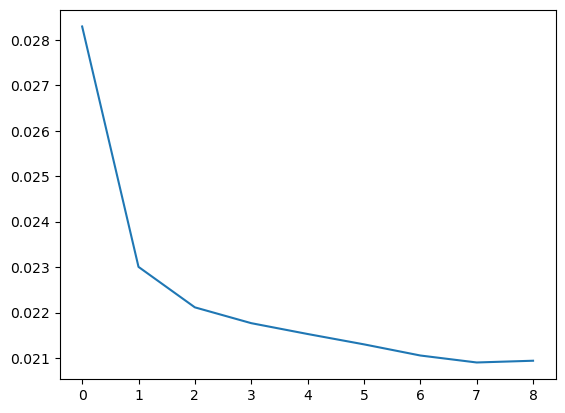

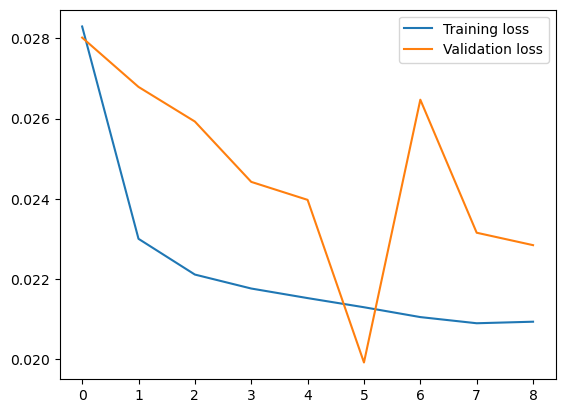

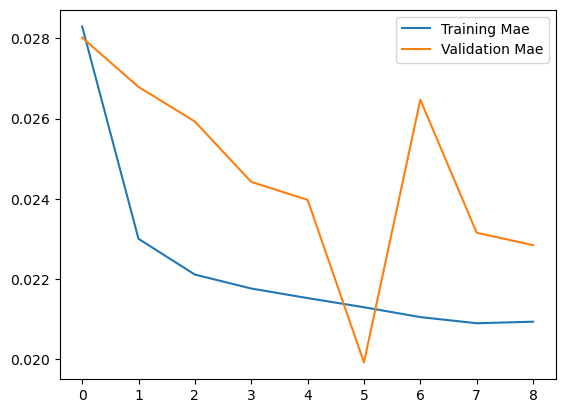

In [20]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

2770/2770 [==============================] - 13s 5ms/step


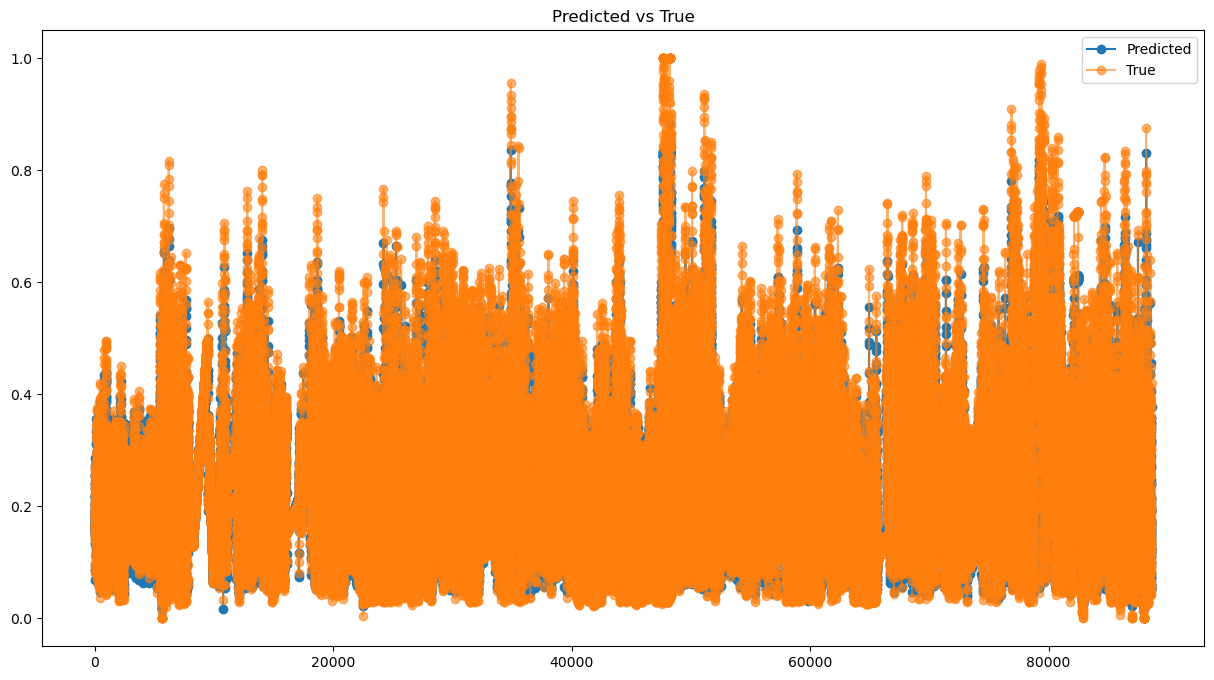

In [21]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [22]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.019318673133348275,
 'mse': 0.03071322528787793,
 'rmse': 0.0009433022075839444}